In [1]:
import numpy as np
import pylab
#import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('hcc-data-complete-balanced.csv') #cargamos tabla
data

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.70,1,3.5,0.50,52.5,37.0,856.0,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7.0,0.58,1,1.8,0.85,32.0,10.0,18.0,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7.0,2.10,5,13.0,0.10,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.20,131.0,78.0,1316.0,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.80,1,9.0,0.10,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,1,1,0,0,...,117,7.0,5.25,2,8.8,1.35,73.3,46.0,873.0,0
200,0,1,1,0,0,0,0,1,0,0,...,231,6.5,0.78,2,7.6,1.04,69.3,23.0,70.0,0
201,1,1,1,0,0,0,0,1,0,0,...,304,7.0,1.07,1,12.0,1.57,71.2,29.0,106.0,0
202,1,1,1,0,0,0,0,1,0,0,...,197,7.2,1.08,5,3.0,0.63,94.4,83.0,859.0,0


In [3]:
data['Class'].value_counts().sort_index()

0    102
1    102
Name: Class, dtype: int64

In [4]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


Obtenemos los subconjuntos de datos

In [5]:
x = data.drop(['Class'], axis=1) 
y=data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.2, random_state=42)


In [26]:
x.iloc[:, 35]

0      3.40
1      3.90
2      3.30
3      3.70
4      4.10
       ... 
199    3.18
200    3.26
201    2.93
202    3.31
203    3.40
Name: Albumin, Length: 204, dtype: float64

## 4.REGRESIÓN LOGÍSTICA

Realizamos proceso normalizando los datos

In [7]:
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)
x_train_transformed=scaler.transform(x_train)
x_test_transformed=scaler.transform(x_test)

clf = LogisticRegression(solver='lbfgs',multi_class='ovr').fit(x_train_transformed, y_train)




In [8]:
y_pred=clf.predict(x_test_transformed)
prestations=classification_report(y_test,y_pred)
print(prestations)
print('\n \n Matriz de confusion: ')
matrix= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matrix

print ('AUC:', roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.83      0.75      0.79        20

    accuracy                           0.80        41
   macro avg       0.81      0.80      0.80        41
weighted avg       0.81      0.80      0.80        41


 
 Matriz de confusion: 
AUC: 0.8035714285714286


## KNN

In [9]:
#Trabajamos con datos normalizados

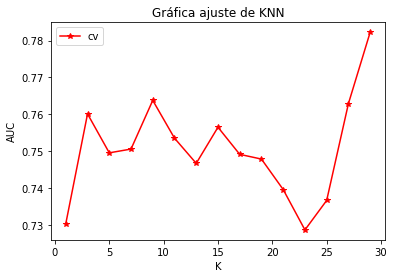

29

In [10]:
from sklearn.metrics import classification_report
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)
x_train_transformed=scaler.transform(x_train)
x_test_transformed=scaler.transform(x_test)

c_values=range(1,31,2)
cv_k_scores=[]

for k in c_values:

    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, x_train_transformed, y_train, cv=3, scoring='roc_auc') #aplicamos cross validation
    cv_k_scores.append(scores.mean())
       
plt.plot(c_values,cv_k_scores,color='r' , marker='*' , label="cv")
plt.ylabel('AUC')
plt.xlabel('K')
plt.title('Gráfica ajuste de KNN')
plt.legend(loc='best')
plt.show()
    
        
    
    
    
    
#select the maximum because we are considering accuracy
k_opt2=(np.array(c_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
k_opt2
#obtengo valor maximo que tengo que usar para mi clasificador(k)   

In [11]:
#entrenamos nuestro modelo
clf = KNeighborsClassifier(n_neighbors=k_opt2).fit(x_train_transformed,y_train)



In [12]:
y_pred=clf.predict(x_test_transformed)
prestations=classification_report(y_test,y_pred)
print(prestations)
print('\n \n Matriz de confusion: ')
matrix= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matrix


print ('AUC:', roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.79      0.75      0.77        20

    accuracy                           0.78        41
   macro avg       0.78      0.78      0.78        41
weighted avg       0.78      0.78      0.78        41


 
 Matriz de confusion: 
AUC: 0.7797619047619048


 ### ÁRBOLES DE DECISIÓN

In [13]:
#En este caso podemos trabajar con los datos sin normalizar, ya que vamos a obtener las mismas prestaciones.

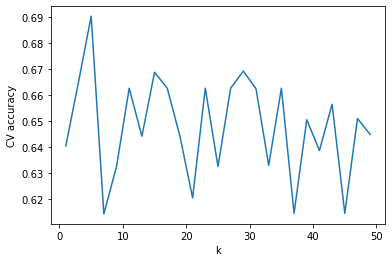

5

In [14]:
from sklearn import tree

k_values=range(1,51,2)
cv_k_scores=[]

for k in k_values:
    
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, x_train, y_train, cv=3, scoring='roc_auc') #aplicamos cross validation
    cv_k_scores.append(scores.mean())
    
    
plt.plot(k_values,cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')   
plt.show()
    
    
#select the maximum because we are considering accuracy
k_opt3=(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
k_opt3

#obtengo valor maximo que tengo que usar para mi clasificador(k)

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=k_opt3).fit(x_train , y_train ) #entreno arbol


In [16]:
y_pred=clf.predict(x_test)
prestations=classification_report(y_test,y_pred)
print(prestations)
print('\n \n Matriz de confusion: ')
matrix= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matrix


print ('AUC:', roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.82      0.70      0.76        20

    accuracy                           0.78        41
   macro avg       0.79      0.78      0.78        41
weighted avg       0.79      0.78      0.78        41


 
 Matriz de confusion: 
AUC: 0.7785714285714287


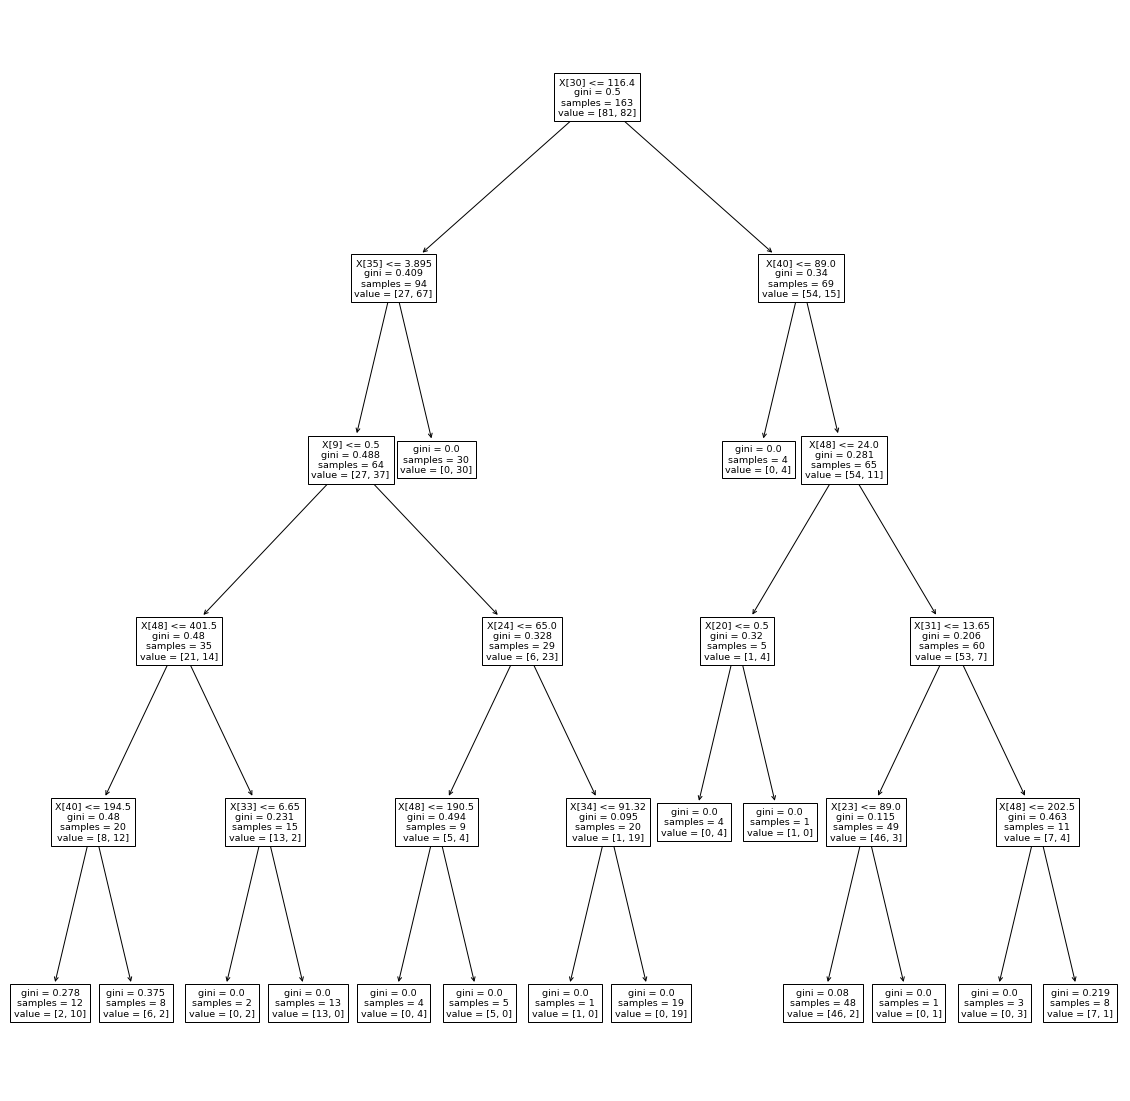

In [17]:
#pintamos árbol con datos de train
plt.figure(figsize=(20,20))
from sklearn import tree

tree=tree.plot_tree(clf.fit(x_train , y_train )) 


Del árbol extraemos como información relevante algunas características que considera importantes de nuestro conjunto de datos: Estas características son: AFP, ALP, Ferritina, Hemoglobina,edad , si es fumador o no y la albúmina

## NAIVE BAYES

In [18]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(x_train, y_train)

In [19]:
#predicción de test
y_pred=clf.predict(x_test)
prestations=classification_report(y_test,y_pred)
print(prestations)
print('\n \n Matriz de confusion: ')
matrix= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matrix


print ('AUC:', roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        21
           1       0.62      0.90      0.73        20

    accuracy                           0.68        41
   macro avg       0.73      0.69      0.67        41
weighted avg       0.73      0.68      0.67        41


 
 Matriz de confusion: 
AUC: 0.6880952380952381
